# Test analysis

Statistical analysis for 3 1 minute tests and 3 2 minute tests of the **Robot-Shop** application

### Workloads

- **1 minute test**:
    - Single API request
    - Simulated day length: 60 seconds = 1 minute
    - 10 requests per second
    - About 600 total requests (without considering network noise)


- **2 minute test**:
    - Single API request
    - Simulated day length: 120 seconds = 2 minute
    - 5 requests per second
    - About 600 total requests (without considering network noise)

### Imports and functions

In [1]:
import os
import sys
import pandas as pd

from IPython.display import display_html
from itertools import chain,cycle,combinations

import matplotlib.pyplot as plt

In [2]:
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h3 style="text-align: center;">{title}</h3>'
        html_str+='<br />'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [3]:
module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import testlib

### Configs

In [5]:
# pandas configs
pd.set_option("display.max_column", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_seq_items", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("expand_frame_repr", True)

### Datasets - import

In [6]:
# tests description
t1_d, u1 = 1, 'm'
t2_d, u2 = 2, 'm'

In [7]:
datasets = testlib.import_netgen_datasets("data")

In [8]:
datasets[0][0]

['/home/riccardo/Documenti/GitHub/rootvr/dmon-xanalysis/test/221213-152748-robotshop/data/221213-152748-0-1m-tests/2-1m/2.net.gen.json',
 '/home/riccardo/Documenti/GitHub/rootvr/dmon-xanalysis/test/221213-152748-robotshop/data/221213-152748-0-1m-tests/2-1m/1.net.gen.json',
 '/home/riccardo/Documenti/GitHub/rootvr/dmon-xanalysis/test/221213-152748-robotshop/data/221213-152748-0-1m-tests/2-1m/3.net.gen.json',
 '/home/riccardo/Documenti/GitHub/rootvr/dmon-xanalysis/test/221213-152748-robotshop/data/221213-152748-0-1m-tests/2-1m/0.net.gen.json']

In [9]:
datasets[1][0]

['/home/riccardo/Documenti/GitHub/rootvr/dmon-xanalysis/test/221213-152748-robotshop/data/221213-153104-1-2m-tests/1-2m/2.net.gen.json',
 '/home/riccardo/Documenti/GitHub/rootvr/dmon-xanalysis/test/221213-152748-robotshop/data/221213-153104-1-2m-tests/1-2m/1.net.gen.json',
 '/home/riccardo/Documenti/GitHub/rootvr/dmon-xanalysis/test/221213-152748-robotshop/data/221213-153104-1-2m-tests/1-2m/4.net.gen.json',
 '/home/riccardo/Documenti/GitHub/rootvr/dmon-xanalysis/test/221213-152748-robotshop/data/221213-153104-1-2m-tests/1-2m/3.net.gen.json',
 '/home/riccardo/Documenti/GitHub/rootvr/dmon-xanalysis/test/221213-152748-robotshop/data/221213-153104-1-2m-tests/1-2m/0.net.gen.json']

### DataFrames - building

In [10]:
# all dataframes of Test 1
dataframes_t1 = []
# all dataframes of Test 2
dataframes_t2 = []

for cur_test in datasets[0]:
    dataframes_t1.append(testlib.build_df_from_json_files(cur_test))

for cur_test in datasets[1]:
    dataframes_t2.append(testlib.build_df_from_json_files(cur_test))

### DataFrames - cleaning network noise

For the comparison between the tests we cannot have **SendIP** and **RecvIP** differences.

In [11]:
# cleaning network noise for every pair of dataframes
for df1, df2 in combinations(dataframes_t1 + dataframes_t2, 2):
    testlib.cmpdiff(df1, df2, "SendIP")
    testlib.cmpdiff(df1, df2, "RecvIP")


deleting 5 items from function param (df2) - [1788, 2736, 2738, 2943, 3460]


deleting 8 items from function param (df2) - [1592, 1593, 83, 357, 915, 1594, 1874, 1940]


deleting 1 items from function param (df2) - [1595]


deleting 7 items from function param (df2) - [2257, 2258, 1946, 2259, 3037, 3313, 3887]


deleting 1 items from function param (df2) - [2260]



### DataFrames - sorting by Timestamp

In [12]:
for df in dataframes_t1 + dataframes_t2:
    df.sort_values("Timestamp", inplace=True)

### DataFrames - generating test Elapsed time

In [13]:
for df in dataframes_t1 + dataframes_t2:
    df["Elapsed"] = pd.to_datetime((df["Timestamp"] - df["Timestamp"].min()), unit="ns").dt.time

In [14]:
print(f"Tests {t1_d}{u1}:", end='\n\n')
for i, df in enumerate(dataframes_t1, 1):
    print(f"- Test {i}:")
    print(df.head())
    print("\n\n")

print(f"Tests {t2_d}{u1}:", end='\n\n')
for i, df in enumerate(dataframes_t2, 1):
    print(f"- Test {i}:")
    print(df.head())
    print("\n\n")

Tests 1m:

- Test 1:
               Timestamp       SendIP       RecvIP  TimeDelta   Elapsed
2757 2022-12-13 14:29:54   172.18.0.6   172.18.0.2   0.000065  00:00:00
2756 2022-12-13 14:29:54   172.18.0.2   172.18.0.6   0.000020  00:00:00
2762 2022-12-13 14:29:58  172.18.0.10   172.18.0.2   0.000044  00:00:04
2761 2022-12-13 14:29:58   172.18.0.2  172.18.0.10   0.000032  00:00:04
2760 2022-12-13 14:29:58  172.18.0.10   172.18.0.2   0.000140  00:00:04



- Test 2:
               Timestamp       SendIP      RecvIP  TimeDelta   Elapsed
2720 2022-12-13 14:27:47   172.18.0.4  172.18.0.8   0.000023  00:00:00
2719 2022-12-13 14:27:47   172.18.0.8  172.18.0.4   0.000072  00:00:00
2718 2022-12-13 14:27:47   172.18.0.4  172.18.0.8   0.000028  00:00:00
2725 2022-12-13 14:27:48  172.18.0.10  172.18.0.2   0.000018  00:00:01
2724 2022-12-13 14:27:48  172.18.0.10  172.18.0.2   0.000010  00:00:01



- Test 3:
               Timestamp       SendIP       RecvIP  TimeDelta   Elapsed
2737 2022-12-13 14:28:5

### Statistical descriptions of the data

#### Test 1m

In [15]:
display_side_by_side(*[df.describe() for df in dataframes_t1], titles=[f"Test {i}" for i, df in enumerate(dataframes_t1, 1)])

,TimeDelta
count,3.756000e+03
mean,5.810533e-02
std,4.251584e-01
min,4.600000e-08
25%,3.379375e-05
50%,1.121180e-04
75%,5.437490e-04
max,5.002826e+00
,TimeDelta
count,3.718000e+03


#### Test 2m

In [16]:
display_side_by_side(*[df.describe() for df in dataframes_t2], titles=[f"Test {i}" for i, df in enumerate(dataframes_t2, 1)])

,TimeDelta
count,4.198000e+03
mean,1.176061e-01
std,6.534965e-01
min,5.000000e-08
25%,3.220675e-05
50%,9.832700e-05
75%,5.002885e-04
max,1.685347e+01
,TimeDelta
count,3.999000e+03


### Confidence interval of the describes

***We will use a 95% confidence level***

The 95% confidence interval is a range of values that you can be 95% confident contains the true mean of the population.

$$\overline{X} \pm Z\frac{S}{\sqrt{N}}$$

Where:
- $\overline{X}$ is the sample mean
- $S$ is the sample standard deviation
- $Z$ is the Z-score. For a 95% confidence level is always $1.96$. A Z-score describes the position of a raw score in terms of its distance from the mean, when measured in standard deviation units
- $N$ is the sample size

In [17]:
count_list_t1 = [df.TimeDelta.count() for df in dataframes_t1]
mean_list_t1 = [df.TimeDelta.mean() for df in dataframes_t1]
std_list_t1 = [df.TimeDelta.std() for df in dataframes_t1]
min_list_t1 = [df.TimeDelta.min() for df in dataframes_t1]
q_1_list_t1 = [df.TimeDelta.quantile(.25) for df in dataframes_t1]
q_2_list_t1 = [df.TimeDelta.quantile(.50) for df in dataframes_t1]
q_3_list_t1 = [df.TimeDelta.quantile(.75) for df in dataframes_t1]
max_list_t1 = [df.TimeDelta.max() for df in dataframes_t1]

count_list_t2 = [df.TimeDelta.count() for df in dataframes_t2]
mean_list_t2 = [df.TimeDelta.mean() for df in dataframes_t2]
std_list_t2 = [df.TimeDelta.std() for df in dataframes_t2]
min_list_t2 = [df.TimeDelta.min() for df in dataframes_t2]
q_1_list_t2 = [df.TimeDelta.quantile(.25) for df in dataframes_t2]
q_2_list_t2 = [df.TimeDelta.quantile(.50) for df in dataframes_t2]
q_3_list_t2 = [df.TimeDelta.quantile(.75) for df in dataframes_t2]
max_list_t2 = [df.TimeDelta.max() for df in dataframes_t2]

In [18]:
print(f"Test {t1_d}{u1} measures 95% confidence interval:", end='\n\n')
print(f"count: {testlib.confidence_95_interval(count_list_t1)}")
print(f"mean : {testlib.confidence_95_interval(mean_list_t1)}")
print(f"std  : {testlib.confidence_95_interval(std_list_t1)}")
print(f"min  : {testlib.confidence_95_interval(min_list_t1)}")
print(f"q1   : {testlib.confidence_95_interval(q_1_list_t1)}")
print(f"q2   : {testlib.confidence_95_interval(q_2_list_t1)}")
print(f"q3   : {testlib.confidence_95_interval(q_3_list_t1)}")
print(f"max  : {testlib.confidence_95_interval(max_list_t1)}")

print("\n\n")

print(f"Test {t2_d}{u2} measures 95% confidence interval:", end='\n\n')
print(f"count: {testlib.confidence_95_interval(count_list_t2)}")
print(f"mean : {testlib.confidence_95_interval(mean_list_t2)}")
print(f"std  : {testlib.confidence_95_interval(std_list_t2)}")
print(f"min  : {testlib.confidence_95_interval(min_list_t2)}")
print(f"q1   : {testlib.confidence_95_interval(q_1_list_t2)}")
print(f"q2   : {testlib.confidence_95_interval(q_2_list_t2)}")
print(f"q3   : {testlib.confidence_95_interval(q_3_list_t2)}")
print(f"max  : {testlib.confidence_95_interval(max_list_t2)}")

Test 1m measures 95% confidence interval:

count: (3717.1555062959033, 3752.8444937040967)
mean : (0.05653082229354437, 0.08715907639882314)
std  : (0.3834776268722436, 0.8736071732194667)
min  : (6.305624125389202e-10, 1.087027709207944e-07)
q1   : (3.3571968706080026e-05, 3.490786462725331e-05)
q2   : (0.0001118806697936585, 0.00011492899687300815)
q3   : (0.0005404990599698489, 0.0005638234400301513)
max  : (5.386153394145692, 30.80234345718764)



Test 2m measures 95% confidence interval:

count: (3954.314397825802, 4171.018935507531)
mean : (0.12008559454395601, 0.14575431132364813)
std  : (0.6989815066868756, 1.0744732272925965)
min  : (1.6283013784615485e-08, 4.638365288205118e-08)
q1   : (3.157309726520814e-05, 3.536073606812521e-05)
q2   : (9.852164428311953e-05, 0.00011047035571688046)
q3   : (0.0005010432301389149, 0.0005601494365277519)
max  : (18.9281716064029, 35.543122940263764)


### Dataframes - removing TimeDelta outliers (cleaning network noise)

In [19]:
for df in dataframes_t1 + dataframes_t2:
    sendIPs = list(set(df["SendIP"]))

    for ip in sendIPs:
        q3 = df[df.SendIP == ip].TimeDelta.quantile(.75)

        idx = list(df[(df.TimeDelta > q3) & (df.SendIP == ip)].index)
        df.drop(index=idx, axis=0, inplace=True)

### Statistical descriptions (post outliers cleaning)

#### Test 1m

In [20]:
display_side_by_side(*[df.describe() for df in dataframes_t1], titles=[f"Test {i}" for i, df in enumerate(dataframes_t1, 1)])

,TimeDelta
count,2.815000e+03
mean,1.035306e-02
std,1.156278e-01
min,4.600000e-08
25%,2.608900e-05
50%,6.477200e-05
75%,1.469515e-04
max,5.000437e+00
,TimeDelta
count,2.786000e+03


#### Test 2m

In [21]:
display_side_by_side(*[df.describe() for df in dataframes_t2], titles=[f"Test {i}" for i, df in enumerate(dataframes_t2, 1)])

,TimeDelta
count,3.148000e+03
mean,1.939897e-02
std,1.995268e-01
min,5.000000e-08
25%,2.501700e-05
50%,5.834250e-05
75%,1.275205e-04
max,5.000805e+00
,TimeDelta
count,2.998000e+03


### Confidence intervals of the describes (post outliers cleaning)

In [22]:
count_list_t1 = [df.TimeDelta.count() for df in dataframes_t1]
mean_list_t1 = [df.TimeDelta.mean() for df in dataframes_t1]
std_list_t1 = [df.TimeDelta.std() for df in dataframes_t1]
min_list_t1 = [df.TimeDelta.min() for df in dataframes_t1]
q_1_list_t1 = [df.TimeDelta.quantile(.25) for df in dataframes_t1]
q_2_list_t1 = [df.TimeDelta.quantile(.50) for df in dataframes_t1]
q_3_list_t1 = [df.TimeDelta.quantile(.75) for df in dataframes_t1]
max_list_t1 = [df.TimeDelta.max() for df in dataframes_t1]

count_list_t2 = [df.TimeDelta.count() for df in dataframes_t2]
mean_list_t2 = [df.TimeDelta.mean() for df in dataframes_t2]
std_list_t2 = [df.TimeDelta.std() for df in dataframes_t2]
min_list_t2 = [df.TimeDelta.min() for df in dataframes_t2]
q_1_list_t2 = [df.TimeDelta.quantile(.25) for df in dataframes_t2]
q_2_list_t2 = [df.TimeDelta.quantile(.50) for df in dataframes_t2]
q_3_list_t2 = [df.TimeDelta.quantile(.75) for df in dataframes_t2]
max_list_t2 = [df.TimeDelta.max() for df in dataframes_t2]

In [23]:
print(f"Test {t1_d}{u1} measures 95% confidence interval:", end='\n\n')
print(f"count: {testlib.confidence_95_interval(count_list_t1)}")
print(f"mean : {testlib.confidence_95_interval(mean_list_t1)}")
print(f"std  : {testlib.confidence_95_interval(std_list_t1)}")
print(f"min  : {testlib.confidence_95_interval(min_list_t1)}")
print(f"q1   : {testlib.confidence_95_interval(q_1_list_t1)}")
print(f"q2   : {testlib.confidence_95_interval(q_2_list_t1)}")
print(f"q3   : {testlib.confidence_95_interval(q_3_list_t1)}")
print(f"max  : {testlib.confidence_95_interval(max_list_t1)}")

print("\n\n")

print(f"Test {t2_d}{u2} measures 95% confidence interval:", end='\n\n')
print(f"count: {testlib.confidence_95_interval(count_list_t2)}")
print(f"mean : {testlib.confidence_95_interval(mean_list_t2)}")
print(f"std  : {testlib.confidence_95_interval(std_list_t2)}")
print(f"min  : {testlib.confidence_95_interval(min_list_t2)}")
print(f"q1   : {testlib.confidence_95_interval(q_1_list_t2)}")
print(f"q2   : {testlib.confidence_95_interval(q_2_list_t2)}")
print(f"q3   : {testlib.confidence_95_interval(q_3_list_t2)}")
print(f"max  : {testlib.confidence_95_interval(max_list_t2)}")

Test 1m measures 95% confidence interval:

count: (2785.806545644263, 2812.8601210224037)
mean : (0.00982720837004644, 0.014924378087754852)
std  : (0.10282321296034894, 0.18292278723512764)
min  : (6.305624125389202e-10, 1.087027709207944e-07)
q1   : (2.608095737520733e-05, 2.6856875958126003e-05)
q2   : (6.316450263163607e-05, 6.850016403503058e-05)
q3   : (0.00014563218157014884, 0.00015441448509651785)
max  : (5.000320913033221, 5.0011335249667805)



Test 2m measures 95% confidence interval:

count: (2964.950270212295, 3127.716396454372)
mean : (0.020250351005562137, 0.027070124853786234)
std  : (0.20438136224133516, 0.24387167878872149)
min  : (1.6283013784615485e-08, 4.638365288205118e-08)
q1   : (2.477134123062346e-05, 2.7407992102709877e-05)
q2   : (5.7730875702206534e-05, 6.728779096446016e-05)
q3   : (0.0001301327063467689, 0.00015105312698656447)
max  : (5.000805527961691, 5.000826764704976)


### Plots

- On each line there is an **IP**
- The **1-minute** test plots appear on the left column
- The **2-minute** test plots appear on the right column
- On the **x-axis** we have the **duration** of the test (*Elapsed* dataframe column)
- On the **y-axis** we have the **delta time** of the responses (*TimeDelta* dataframe column)
- All scales are expressed in **seconds**

In [24]:
# number of plots to show
n_plots = 1


Plot 1:


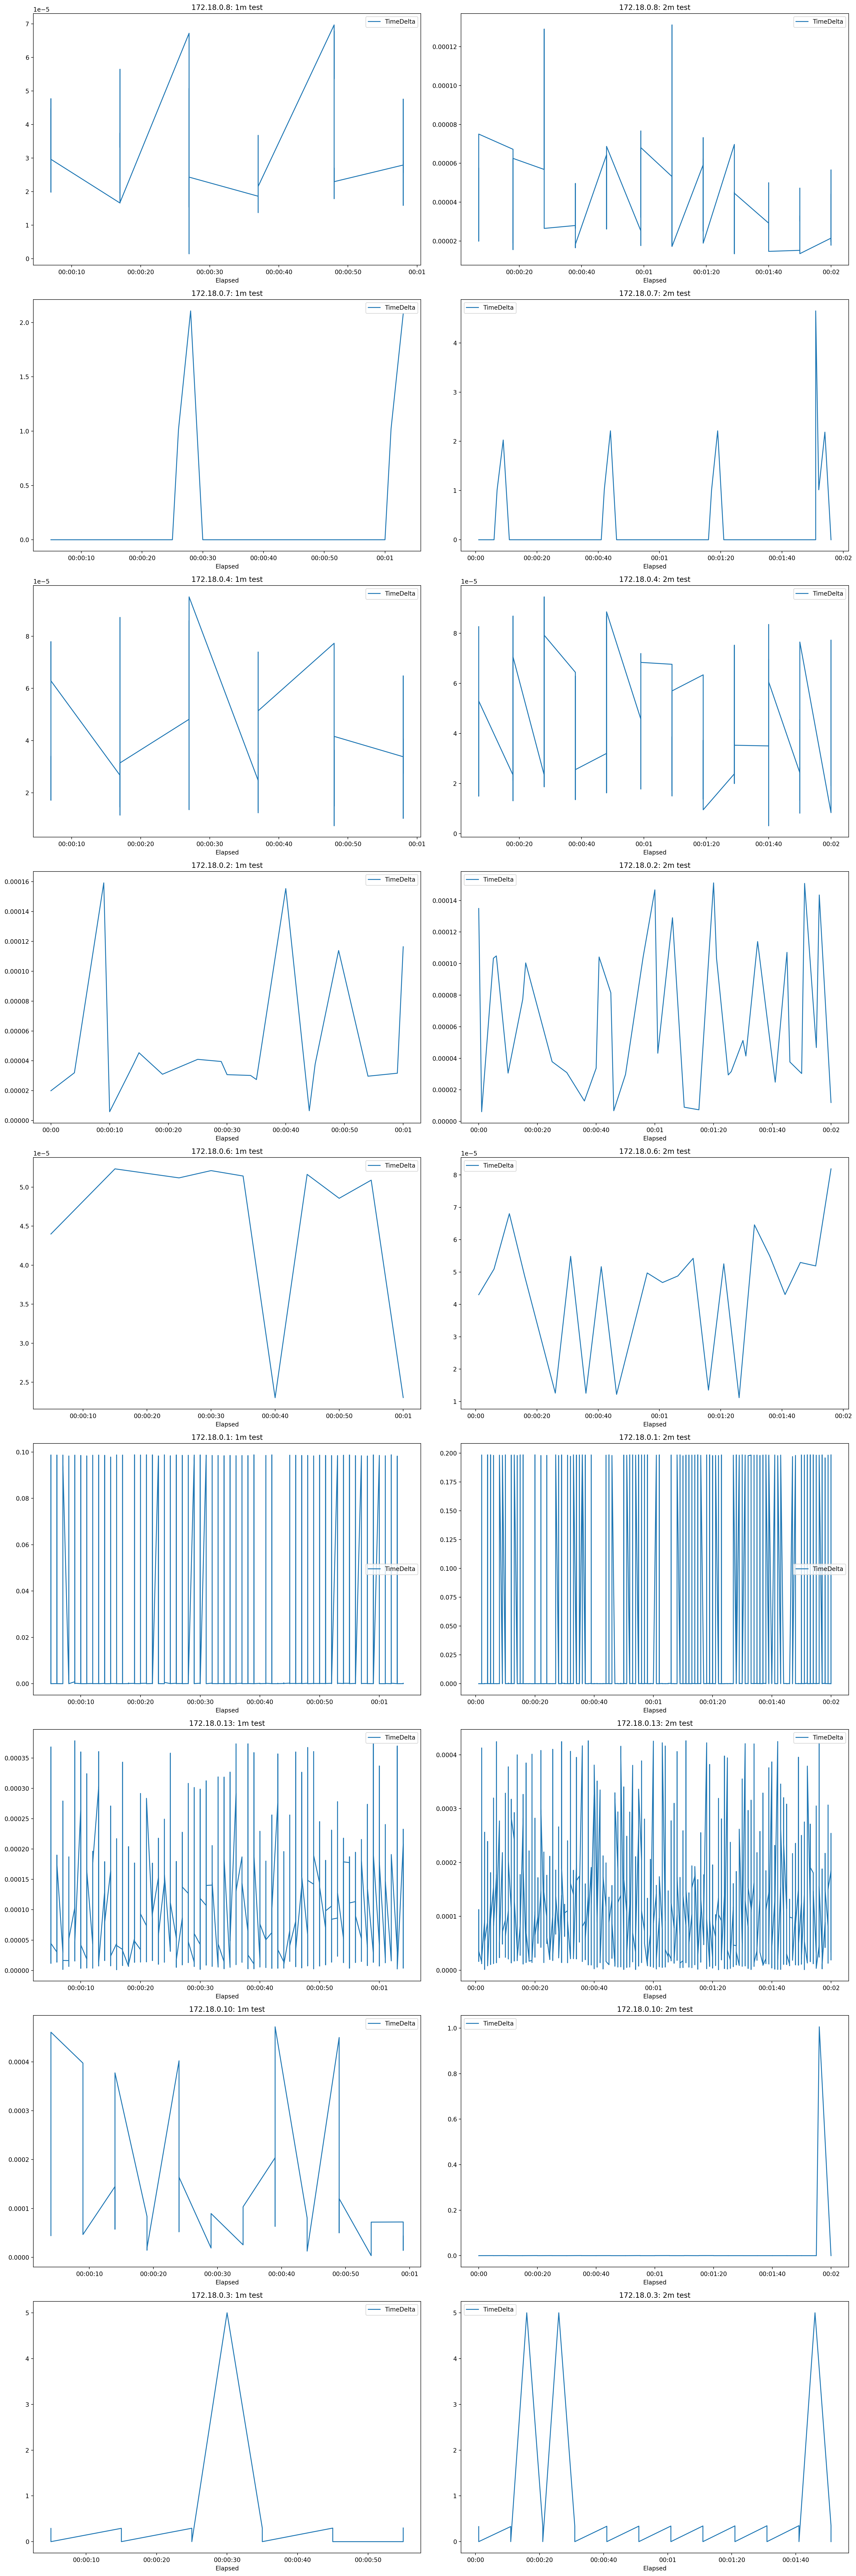

In [25]:
plt.rcParams["figure.facecolor"] = (1.0, 1.0, 1.0, 1.0)
plt.rcParams["axes.facecolor"] = (1.0, 1.0, 1.0, 1.0)
plt.rcParams["figure.figsize"] = (20, 60)
plt.rcParams["figure.dpi"] = 200
plt.rcParams["figure.autolayout"] = True

p = 1
for df1, df2 in zip(dataframes_t1[:n_plots], dataframes_t2[:n_plots]):
    print()
    print(f"Plot {p}:")
    sendIPs = list(set(df1["SendIP"]))
    fg, ax = plt.subplots(nrows=len(sendIPs), ncols=2)
    row, col = 0, 0

    for ip in sendIPs:
        df1[df1["SendIP"] == ip].plot(
            x="Elapsed",
            y="TimeDelta",
            ax=ax[row][col],
            title=f"{ip}: {t1_d}{u1} test",
        )
        df2[df2["SendIP"] == ip].plot(
            x="Elapsed",
            y="TimeDelta",
            ax=ax[row][col + 1],
            title=f"{ip}: {t2_d}{u2} test",
        )
        row += 1

    fg.tight_layout()
    # plt.savefig("robotshop-30m-10m-3600r-cmp.png")
    plt.show()
    p = p + 1